In [1]:
# Include only if testing local Neet directory (not needed if running pip installed Neet)
import sys
sys.path.insert(0, "../")

This file provides a few basic examples of Neet usage.

First let's load an example network.  There are a number of example networks in `neet.boolean.examples`.  The `s_pombe` network represents the interactions among 9 components that define the cell cycle of *S. pombe* (fission yeast).

In [2]:
%matplotlib inline

Neet comes with easily loaded example networks out of the box:

In [4]:
from neet.boolean.examples import s_pombe

In [5]:
s_pombe.size

9

In [6]:
s_pombe.names

['SK',
 'Cdc2_Cdc13',
 'Ste9',
 'Rum1',
 'Slp1',
 'Cdc2_Cdc13_active',
 'Wee1_Mik1',
 'Cdc25',
 'PP']

Of course, you can also easily read in your own networks:

In [7]:
from neet.boolean import WTNetwork
from os.path import join

In [8]:
## The cell cycle network for *C. elegans*
nodes_path = join("example_data","c_elegans-nodes.dat")
edges_path = join("example_data","c_elegans-edges.dat")

c_elegans = WTNetwork.read(nodes_path, edges_path)
c_elegans.metadata.update({
    'name': 'c_elegans',
    'description': 'The cell cycle network for *C. elegans*.',
    'citation': '',
})

In [9]:
c_elegans.size

8

In [10]:
c_elegans.names

['cdk-2/cyclinE',
 'cki-1',
 'cdc-14/fzy-1',
 'fzr-1',
 'cdk-1/cyclinB',
 'lin-35/efl-1/dpl-1',
 'cul-1/lin-23',
 'cdc-25.1']

Let's go back to using the `s_pombe` network. The most fundamental aspect of a Neet network is the `update` function, which defines the network's dynamics.  The `update` function takes a network state at timestep `t` and outputs the resulting state at `t+1`:

In [11]:
s_pombe.update([0,0,0,0,0,0,0,0,0])

[0, 1, 0, 0, 0, 0, 0, 0, 0]

The "informational architecture" of a Neet network encapsulates computation of quantities such as active information, entropy rate, transfer entropy, and mutual information.

In [12]:
from neet.information import Architecture

ImportError: cannot import name 'Architecture' from 'neet.information' (..\neet\information.py)

In [ ]:
k = 2 # the history length, the size of each sample in information calculations
timesteps = 5 # the number of timesteps taken from all possible starting points to create samples
arch = Architecture(s_pombe, k, timesteps)

In [ ]:
# the active information for each node
arch.active_information()

In [ ]:
# the mutual information between a pair of nodes
node1index,node2index = 3,5
arch.mutual_information()[node1index,node2index]

The average sensitivity measures the degree to which single bit flips lead to changes that spread through the system.

In [13]:
s_pombe.average_sensitivity()

0.9513888888888888

Neet can tell you which edges in the network are canalizing.

In [14]:
s_pombe.canalizing_edges()

{(0, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (4, 5),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (8, 4)}

If `networkx` and `pygraphviz` are installed, the `draw` function outputs an image representing the causal structure of the network.

Draw network using `networkx`

In [15]:
import networkx as nx

In [16]:
s_pombe_nx_network = s_pombe.network_graph(labels="names")

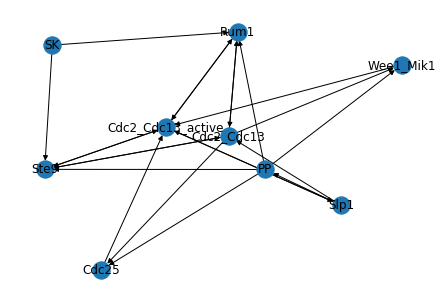

In [17]:
nx.draw(s_pombe_nx_network,with_labels=True)

Or for a nicer looking graph (if you have `pygraphviz` installed)

In [ ]:
from PIL import Image

In [ ]:
s_pombe.draw_network_graph(graphkwargs={'labels':'names'},pygraphkwargs={'path':'s_pombe_network.png','display_image':False})


`graphkwargs` are passed to the `network_graph` method, while `pygraphkwargs` are passed to the `view_pygraphviz` function.

In [ ]:
display(Image.open("s_pombe_network.png"))

An image of the attractor landscape can similarly be generated.

Using `networkx` tends to look awful...

In [ ]:
s_pombe_nx_landscape = s_pombe.landscape_graph()

In [ ]:
nx.draw(s_pombe_nx_landscape,with_labels=True)

...so let's use `pygraphviz`

In [ ]:
s_pombe.draw_landscape_graph(pygraphkwargs={'path':'s_pombe_landscape.png','display_image':False})


`graphkwargs` are passed to the `landscape_graph` method, while `pygraphkwargs` are passed to the `view_pygraphviz` function.

If you noticed, it was much faster to draw the landscape graph the second time. This is because once the landscape graph is created, it is cached (the regular network graph does not get cached like this). 

In [ ]:
display(Image.open("s_pombe_landscape.png"))

Features of the landscape can be easily computed.

The array of attractor cycles, where each element of the array is an array of states in an attractor cycle (some attractors are length one, while others are cycles).

In [ ]:
s_pombe.attractors

The array of basin numbers, indexed by states.

In [ ]:
s_pombe.basins

The trajectory of a particular network state, over a number of timesteps.

In [ ]:
s_pombe.trajectory(361, timesteps=5)

The basin entropy of the landscape.

In [ ]:
s_pombe.basin_entropy

This is only a small sample of the functionality contained within Neet. Check out the docs https://elife-asu.github.io/Neet/ for more info.